In [1]:
%matplotlib inline 
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

### The special thing about time-series data points is that they relate to one another, they are not independent.

In [2]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq='H', periods=20))
ts_lagged = ts.shift(5)

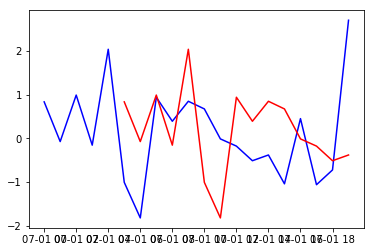

In [3]:
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='red')

In [4]:
ts_lagged = ts.shift(-5)

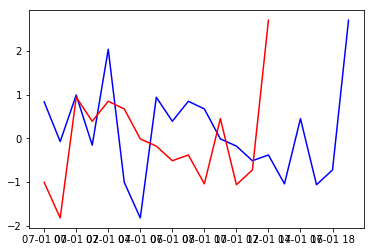

In [5]:
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='red')

In [6]:
ts_lagged = ts.shift(0)

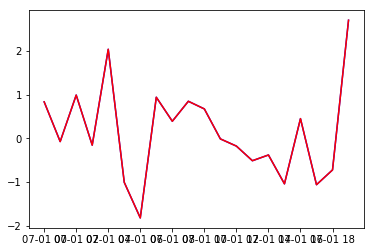

In [7]:
plt.plot(ts, color='blue')
plt.plot(ts_lagged, color='red')

In [8]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [9]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

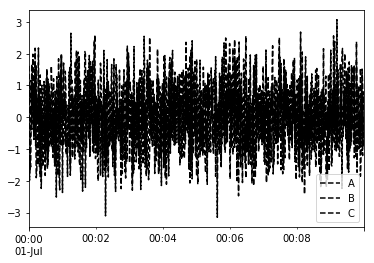

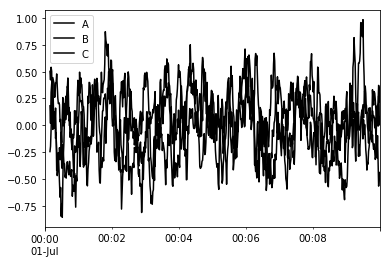

In [10]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [11]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,span=15,min_periods=2,adjust=True).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,0.125423,-0.686404,1.051759
2016-07-01 00:00:02,-0.559713,-0.956053,0.836536
2016-07-01 00:00:03,-0.289972,-1.141227,0.774450
2016-07-01 00:00:04,-0.180146,-0.911324,0.874111
2016-07-01 00:00:05,0.238248,-0.656361,0.586548
2016-07-01 00:00:06,0.311708,-0.373286,0.528890
2016-07-01 00:00:07,0.296351,0.074826,0.616259
2016-07-01 00:00:08,0.208536,0.017410,0.531577
2016-07-01 00:00:09,0.235346,-0.104834,0.361041


In [12]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [13]:
df.head()

,A,B,C,D
2016-06-06,0.053565,0.037988,0.076786,-2.041343
2016-06-07,-1.330920,-0.823863,-0.335129,-1.069008
2016-06-08,-0.944914,-0.674046,0.358590,0.532584
2016-06-09,1.747588,-0.043563,0.520948,-0.880618
2016-06-10,1.687260,-0.655197,-0.363864,1.695624


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e4273d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10e0a5b50>], dtype=object)

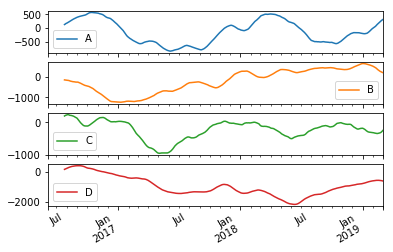

In [14]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [15]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.677847,0.601089,0.633622,1.058642


In [16]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.611895,-0.373944,-0.090779,-2.575846
2016-06-08,-1.148687,-0.735936,-0.027104,-2.576486
2016-06-09,-0.980186,-0.927823,0.134971,-2.796961
2016-06-10,-0.541633,-1.173995,0.159443,-2.590121


In [17]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# This statistic will be less stable because there is more variability captured by the expanding window. 
# When might one vs. the other be appropriate?
# Rolling captures info over a discrete time period whereas an expanding window will
# include seasonal changes within its averages.

In [18]:
# EWMA
# Why use EWMA?
# So new members in a series can be given greater weight while taking into account all data within a
# series.

In [19]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [20]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

In [21]:
dfa = pd.DataFrame(np.random.randn(1000, 3), index=pd.date_range('1/1/2018', periods=1000), columns=['A', 'B', 'C'])

In [22]:
r = dfa.rolling(window=60,min_periods=1)

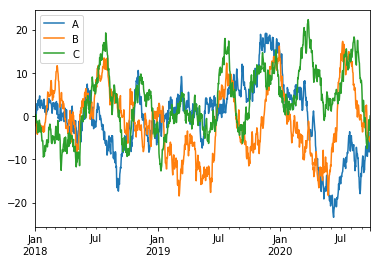

In [23]:
r.aggregate(np.sum).plot()

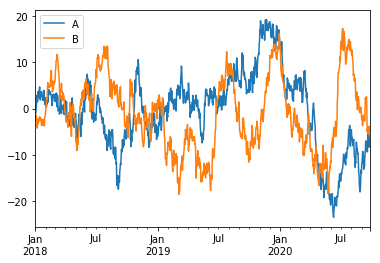

In [24]:
r[['A','B']].aggregate(np.sum).plot()

In [25]:
dfa

,A,B,C
2018-01-01,-0.785536,-0.967708,-0.139587
2018-01-02,-0.212556,-0.382629,-0.283759
2018-01-03,0.888041,-0.922704,0.737902
2018-01-04,0.691668,0.656507,-1.377290
2018-01-05,1.730341,-0.870301,0.063510
2018-01-06,0.540665,-1.242269,-0.584607
2018-01-07,-1.437782,-0.486512,0.213134
2018-01-08,0.132693,1.097329,-2.516620
2018-01-09,1.649712,-0.133695,0.260313
2018-01-10,0.525348,1.044324,1.653004
